In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Logistic%20Regression/bank-full.csv"

--2024-12-11 14:53:17--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/2)%20Classification%20Models/Logistic%20Regression/bank-full.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘bank-full.csv’

bank-full.csv       100%[===================>]   4.40M  --.-KB/s    in 0.08s   

2024-12-11 14:53:18 (54.7 MB/s) - ‘bank-full.csv’ saved [4610348/4610348]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
data = pd.read_csv('bank-full.csv',delimiter=";")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data['y'].value_counts()

,count
y,
no,39922
yes,5289


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

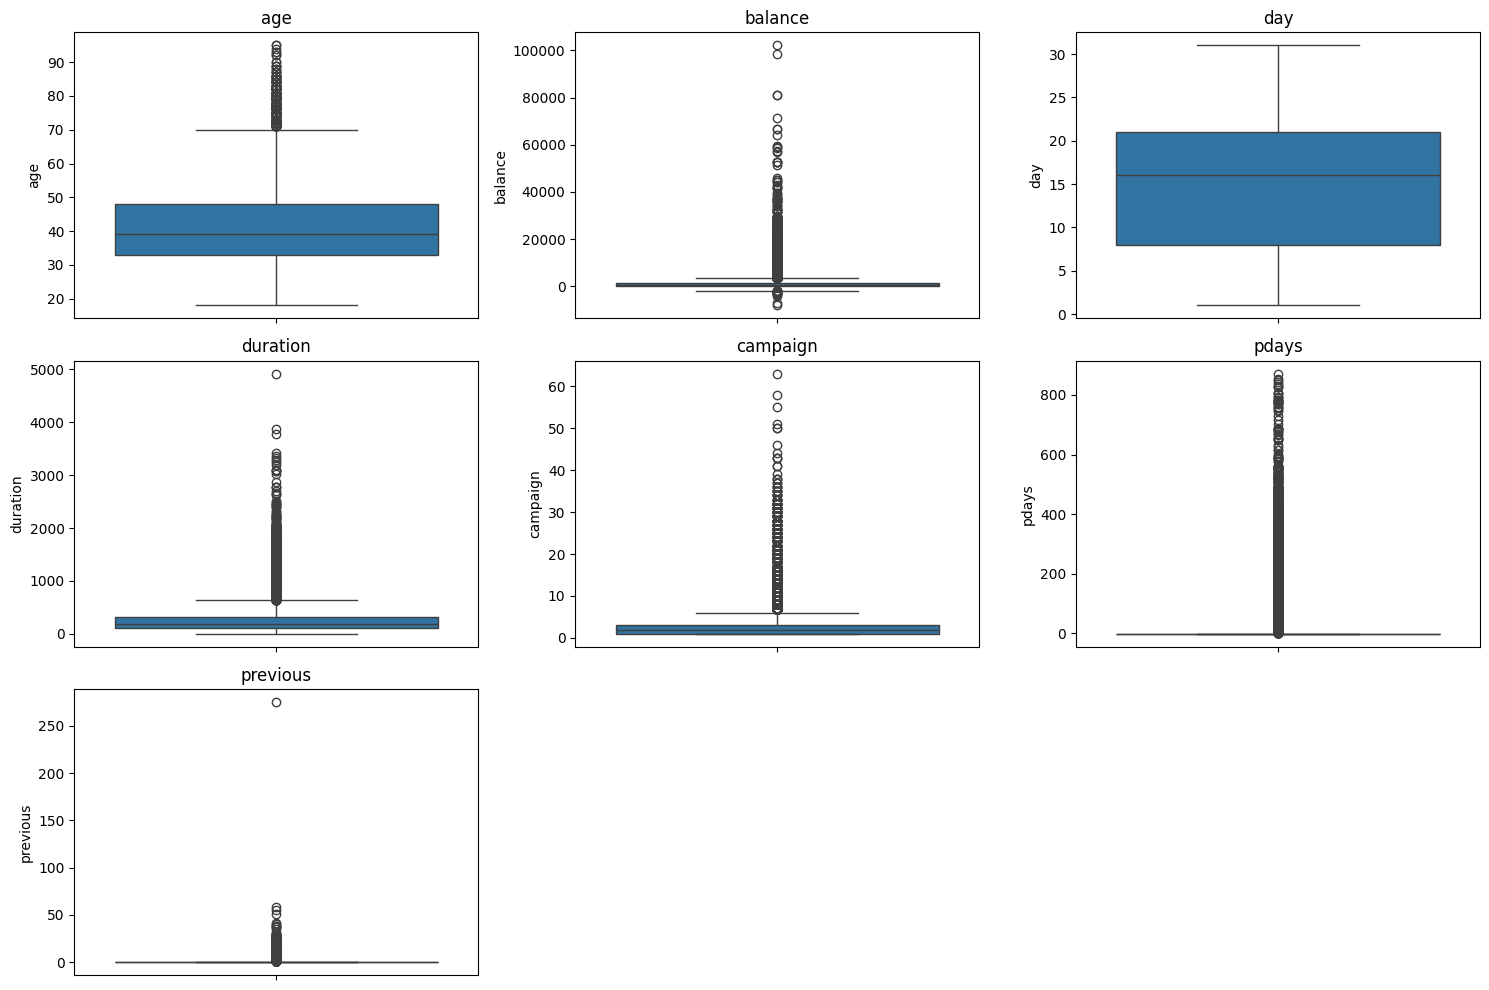

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
def cap_outliers(df, cols):
    for col in cols:
        lower_cap = df[col].quantile(0.01)
        upper_cap = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)
    return df

In [11]:
data = cap_outliers(data, numerical_cols)

In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.887660,1278.121689,15.813541,254.375993,2.691403,39.313884,0.524689
std,10.384267,2249.406970,8.310221,234.779511,2.585740,96.035004,1.457817
min,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


In [13]:
for col in numerical_cols:
    print(f"{col} skewness: {skew(data[col])}")

age skewness: 0.5526097888224227
balance skewness: 3.073396386781546
day skewness: 0.09854057819816199
duration skewness: 2.0769245044989186
campaign skewness: 2.8652388040244423
pdays skewness: 2.3392178966049544
previous skewness: 3.65038534629852


In [14]:
skewed_cols = ['balance', 'duration', 'campaign', 'pdays', 'previous']
for col in skewed_cols:
    data[col] = np.log1p(data[col])  # log1p handles log(0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


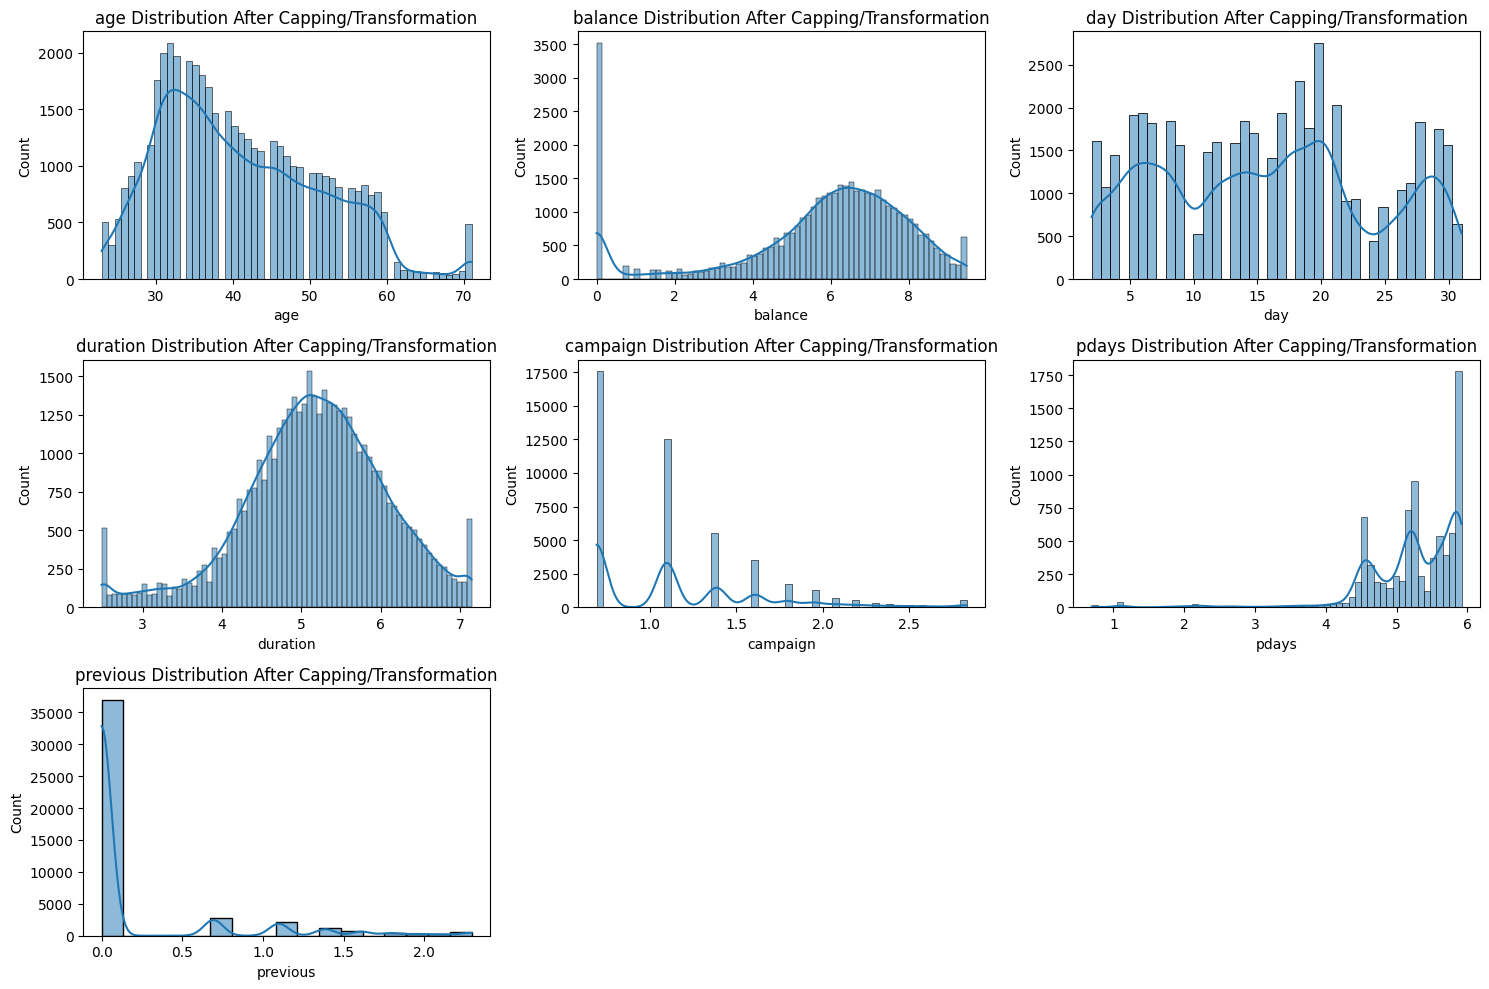

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"{col} Distribution After Capping/Transformation")
plt.tight_layout()
plt.show()

In [16]:
data[['balance', 'pdays']] = data[['balance', 'pdays']].replace([np.inf, -np.inf], np.nan)

data['balance'] = data['balance'].fillna(data['balance'].median())
data['pdays'] = data['pdays'].fillna(data['pdays'].median())

In [17]:
print(np.isinf(data[numerical_cols]).sum())

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


In [18]:
X = data.drop(columns=['y'])
y = data['y']

In [19]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

In [20]:
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [21]:
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [22]:
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [25]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[6412 1573]
 [ 216  842]]
Accuracy: 0.80


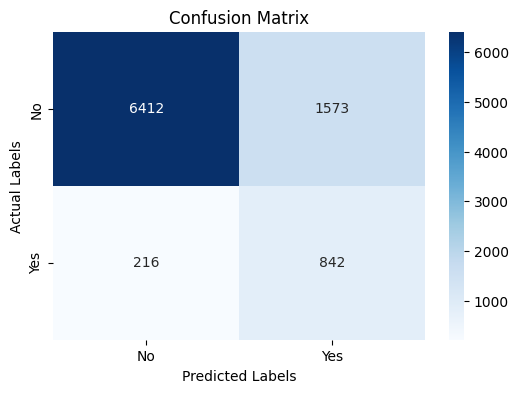

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()